Let's generate 200 uniformly random datapoints in a rectangle. 

In [65]:
library(spatstat)
library(dplyr)

In [66]:
n <- 200 
# number of points

In [67]:
# let's set the range
xmin <- 0
xmax <- 1

ymin <- 0
ymax <- 2

In [68]:
# create a uniform sample distribution
x <- runif(n, 0, 1)
y <- runif(n, 0, 2)

In [69]:
head(x)

[1] 0.46845213 0.16239572 0.19250632 0.01390291 0.84605712 0.20520757

In [70]:
head(y)

[1] 1.1321335 0.6590067 1.5106295 0.9448922 1.9281181 1.5921859

When plotting spatial data, make sure the one X unit is the same size as one Y unit. We don't want any misrepresentation. The Y axis scale to X axis scale is called the aspect ratio. Spatial data should be represented with an aspect ratio of 1:1. 

In [71]:
ls.str() # show me previously assigned variables. 

angle :  num [1:300] 2.47 5.76 3.96 5.2 4.81 ...
disc10 : List of 5
 $ type  : chr "polygonal"
 $ xrange: num [1:2] -10 10
 $ yrange: num [1:2] -10 10
 $ bdry  :List of 1
 $ units :List of 3
lamba :  num 1.59
lambda :  num 1.59
mapxy : function (a = NA)  
n :  num 200
n_points :  num 300
p_cluster : List of 5
 $ window    :List of 5
 $ n         : int 332
 $ x         : num [1:332] 8.934 1.243 -0.349 0.351 1.133 ...
 $ y         : num [1:332] 0.402 -2.997 -0.612 -0.483 -2.52 ...
 $ markformat: chr "none"
ppois : List of 5
 $ window    :List of 5
 $ n         : int 497
 $ x         : num [1:497] -3.153 8.513 -0.794 2.806 2.125 ...
 $ y         : num [1:497] 8.128 -0.465 6.899 0.279 -8.242 ...
 $ markformat: chr "none"
ppxy : List of 5
 $ window    :List of 5
 $ n         : int 300
 $ x         : num [1:300] -4.497 6.119 -2.546 0.766 0.87 ...
 $ y         : num [1:300] 3.58 -3.56 -2.72 -1.45 -8.67 ...
 $ markformat: chr "none"
qt : List of 11
 $ statistic  : Named num 12.1
 $ parameter  

In [72]:
mapxy <- function(a = NA){
    plot(x, y, asp = a)
    rect(xmin, ymin, xmax, ymax)
}

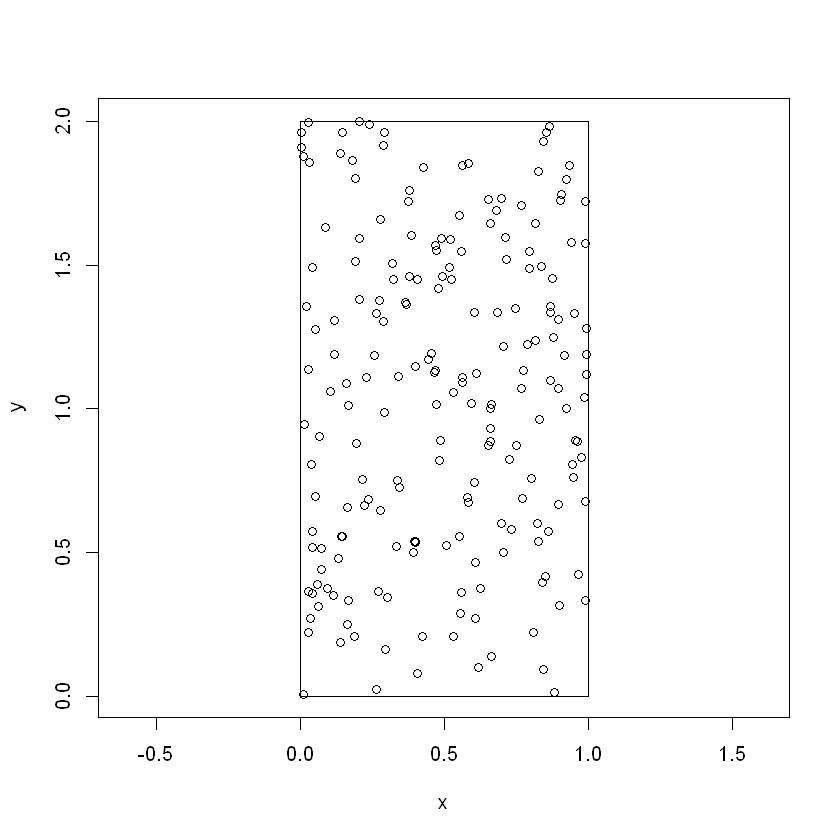

In [73]:
mapxy(1) # aspect ratio = 1

Now let's create a uniform density pattern inside a circle. The spatstat libary contains the disc() function that creates a circular window for you

In [74]:
n_points <- 300
radius <- 10

In [75]:
rSquared <- runif(n_points, 0, radius^2)

In [76]:
head(rSquared)

[1] 82.638123 51.518969 53.289734  2.596537 63.374515 19.473351

In [77]:
angle <- runif(n_points, 0, 2*pi)

In [78]:
head(angle)

[1] 3.6070804 3.2708122 4.3427865 0.7127971 2.0041272 5.4149767

In [79]:
x <- sqrt(rSquared) * cos(angle)

In [80]:
head(x)

[1] -8.123342 -7.117830 -2.637081  1.219064 -3.342714  2.851568

In [81]:
y <- sqrt(rSquared) * sin(angle)

In [82]:
head(y)

[1] -4.0803728 -0.9249167 -6.8070214  1.0537642  7.2250106 -3.3677753

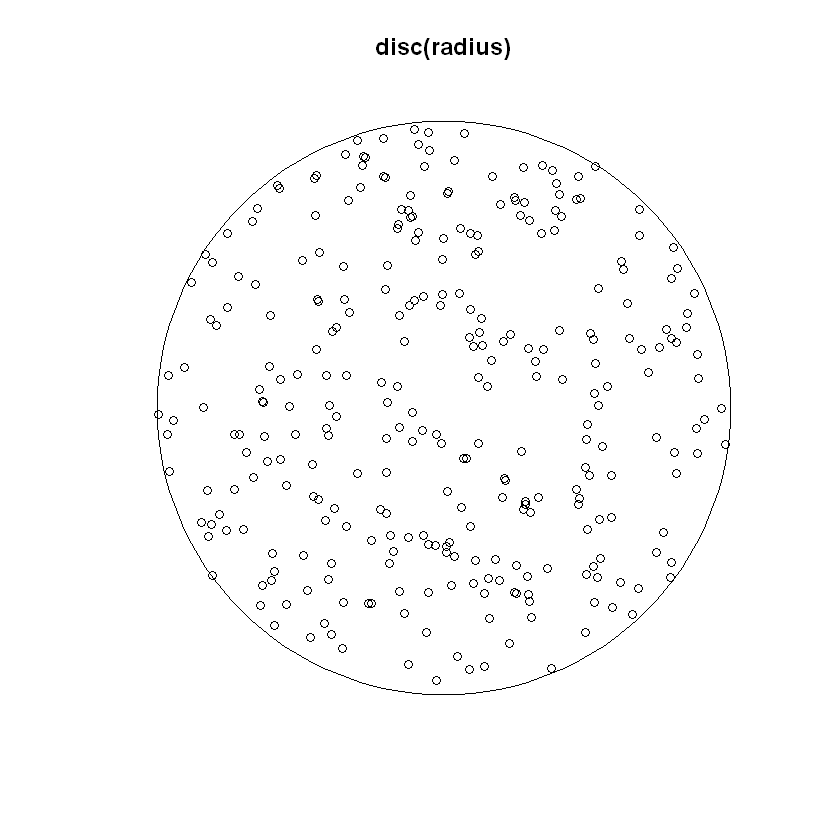

In [83]:
plot(disc(radius))
points(x, y)

- Point = location in a planar space (x, y)
- Event = observed data point

For example: trees can be in any point but the actual locations are considered events. 

Spatial studies occur in a confined area called a "window". Events occcuring outside the "window" are considered unobserved. Spatial point pattern is a set of observed events and the window. Spatial point process is a random number generator for events in a window. Most spatial pattern analysis is spent making inferences about the spatial point process. 

- Marks = other characteristics (height, width, species, etc) about the events. Also called a "Mark Point Pattern".

spatstats stores information in its ppp object (planar point pattern). PPPs contain the (x, y) coords, the window, the marks (optional). 

- Complete Spatial Randomness (CSR) = This just means that no part of the window is any more special than another. And the chance of finding an event somewhere is the same as another location. 

Testing a hypothesis would be interesting for a scientist since rejecting the hypothesis might show that some parts of the forest are producing more trees than others or trees are clumping together or spacing themselves out. The spatstat library has a bunch of tests:

- The Quadrat Test = It can be used to check if the points are completely spatially random. The window is divided into parts (~20 squares) and the number of points in each square are counted. If the process is completely spatially random, then the number of points in the subregions follows a poisson distribution (a simple distribution for counting). The difference between the observed counts and the expected counts lead to a test statistic with a "chi squared" distribution. Larger/smaller values of the test statistic indicate the deviation from complete spatial randomness.

### Create PPP objects and perform a Quadrat Test

Let's run a quadrat count test on some points to verify whether they were uniformly generated on a circle.

In [84]:
ls.str()

angle :  num [1:300] 3.607 3.271 4.343 0.713 2.004 ...
disc10 : List of 5
 $ type  : chr "polygonal"
 $ xrange: num [1:2] -10 10
 $ yrange: num [1:2] -10 10
 $ bdry  :List of 1
 $ units :List of 3
lamba :  num 1.59
lambda :  num 1.59
mapxy : function (a = NA)  
n :  num 200
n_points :  num 300
p_cluster : List of 5
 $ window    :List of 5
 $ n         : int 332
 $ x         : num [1:332] 8.934 1.243 -0.349 0.351 1.133 ...
 $ y         : num [1:332] 0.402 -2.997 -0.612 -0.483 -2.52 ...
 $ markformat: chr "none"
ppois : List of 5
 $ window    :List of 5
 $ n         : int 497
 $ x         : num [1:497] -3.153 8.513 -0.794 2.806 2.125 ...
 $ y         : num [1:497] 8.128 -0.465 6.899 0.279 -8.242 ...
 $ markformat: chr "none"
ppxy : List of 5
 $ window    :List of 5
 $ n         : int 300
 $ x         : num [1:300] -4.497 6.119 -2.546 0.766 0.87 ...
 $ y         : num [1:300] 3.58 -3.56 -2.72 -1.45 -8.67 ...
 $ markformat: chr "none"
qt : List of 11
 $ statistic  : Named num 12.1
 $ param

In [85]:
ppxy <- ppp(x = x, y = y, window = disc(radius))

In [86]:
ppxy

Planar point pattern: 300 points
window: polygonal boundary
enclosing rectangle: [-10, 10] x [-10, 10] units

In [87]:
# testing the point pattern
qt <- quadrat.test(ppxy)

Warning message:
"Some expected counts are small; chi^2 approximation may be inaccurate"

In [88]:
print(qt)


	Chi-squared test of CSR using quadrat counts
	Pearson X2 statistic

data:  ppxy
X2 = 29.408, df = 24, p-value = 0.4103
alternative hypothesis: two.sided

Quadrats: 25 tiles (irregular windows)


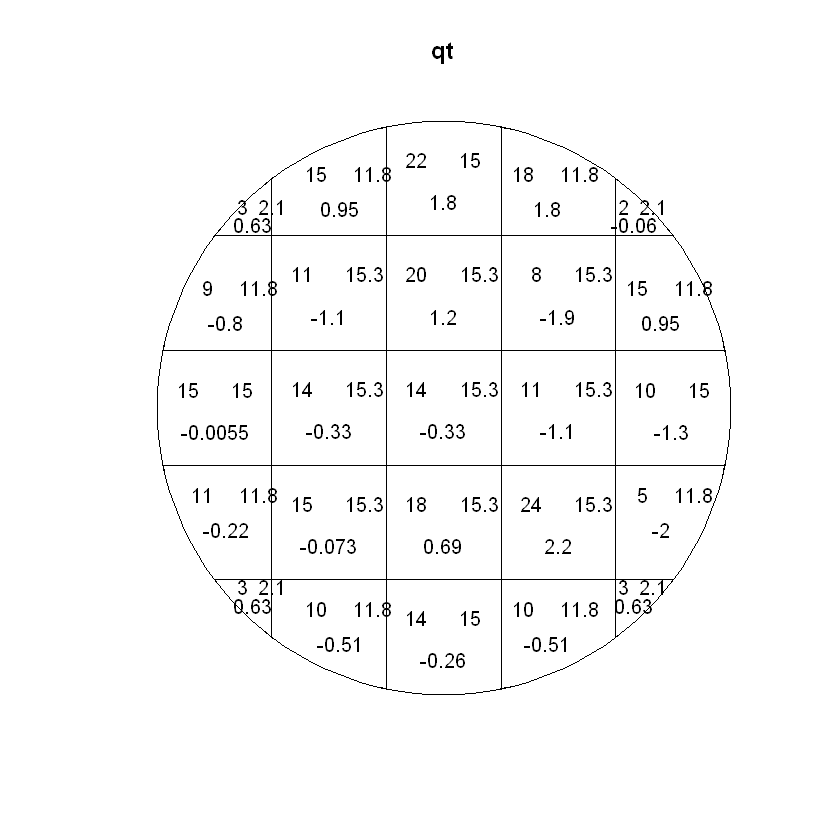

In [89]:
plot(qt)

* p-value >= 0.05 = we cannot reject the null hypothesis that the points are spatially random.
* p-value < 0.05 = we reject the null hypothesis that the points are spatially random.

Poisson point process creates events according to a Poisson distribution. The intensity parameter specifies the expected events per unit area. The total number of events generated is a single number from a poisson distribution. Multiple realizations of the same process can have different numbers of events. 

In [90]:
# create a disc of radius = 10
disc10 <- disc(10)

In [91]:
# compute the rate as count/area
lambda <- 500/area(disc10)

In [92]:
lambda

[1] 1.592189

In [93]:
# create ppp
ppois <- rpoispp(lambda = lambda, win = disc10)

In [94]:
ppois

Planar point pattern: 494 points
window: polygonal boundary
enclosing rectangle: [-10, 10] x [-10, 10] units

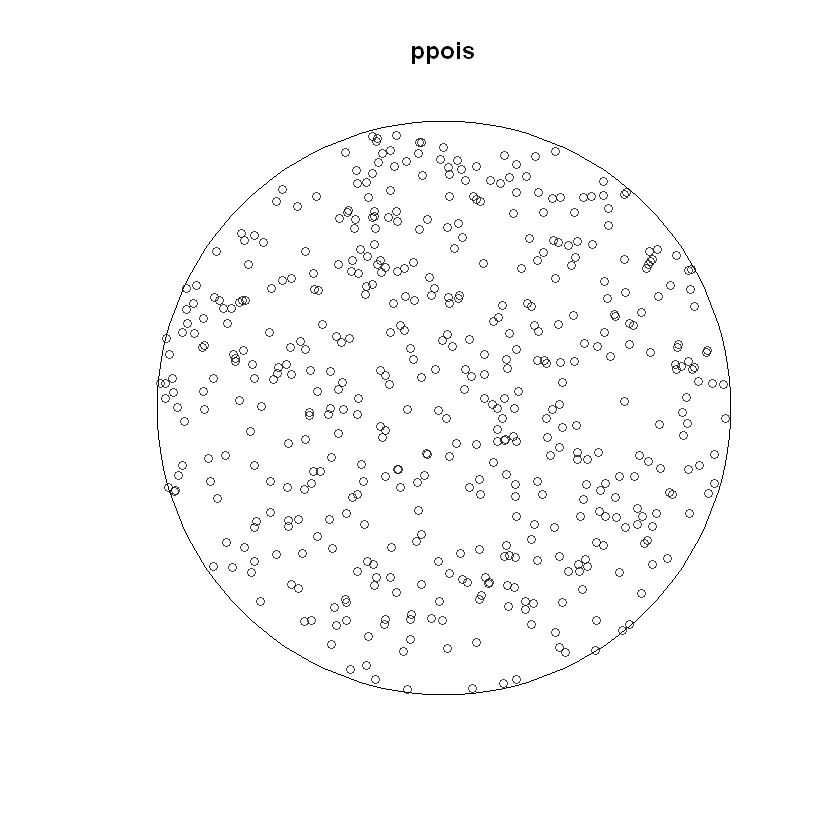

In [95]:
plot(ppois)
# now we have a poisson process that generates completely spatially random points. 

Other point patterns:
- Clustered Processes = Points occur together more than under a uniform poisson process
- Regular (inhibitory) Processes = Points are more spaced apart than under a uniform intensity poisson process. 

The quadrat.test() function can test against clustered or regular alternative hypotheses. 

### Thomas and Strauss Process:

- Thomas Process = Clustered pattern where a number of parent points (uniformly distributed) create a number of child points in their neighborhood. The child points themselves form a pattern. This is an atractive point pattern. It makes sense for modelling things like trees, since new trees will grow near the original tree.

- Strauss Process = Lowers the probability of finding another point nearby. No 2 points can be closer than a set threshold. This is a repulsive point pattern and it makes sense for modelling things like territorial animals since the other animal will avoid the territory of a given animal. Strauss process points are also called "Regularly spaced" points. 

In [96]:
disc10 <- disc(10) 
# create a disc with radius = 10

In [97]:
set.seed(123)

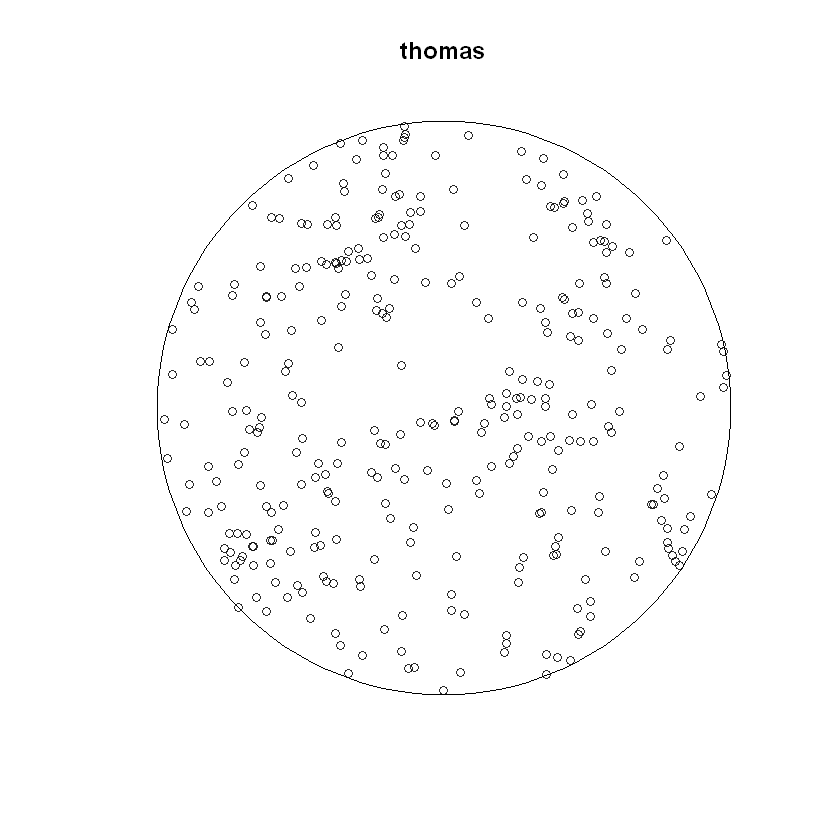

In [98]:
# generate clustered points from a thomas process
thomas <- rThomas(kappa = 0.35, scale = 1, mu = 3, win = disc10)
plot(thomas)

In [99]:
# run a quadrat test 
quadrat.test(thomas, alternative = "clustered")

Warning message:
"Some expected counts are small; chi^2 approximation may be inaccurate"


	Chi-squared test of CSR using quadrat counts
	Pearson X2 statistic

data:  thomas
X2 = 53.387, df = 24, p-value = 0.0005142
alternative hypothesis: clustered

Quadrats: 25 tiles (irregular windows)

Warning message:
"Simulation will be performed in the containing rectangle and clipped to the original window."

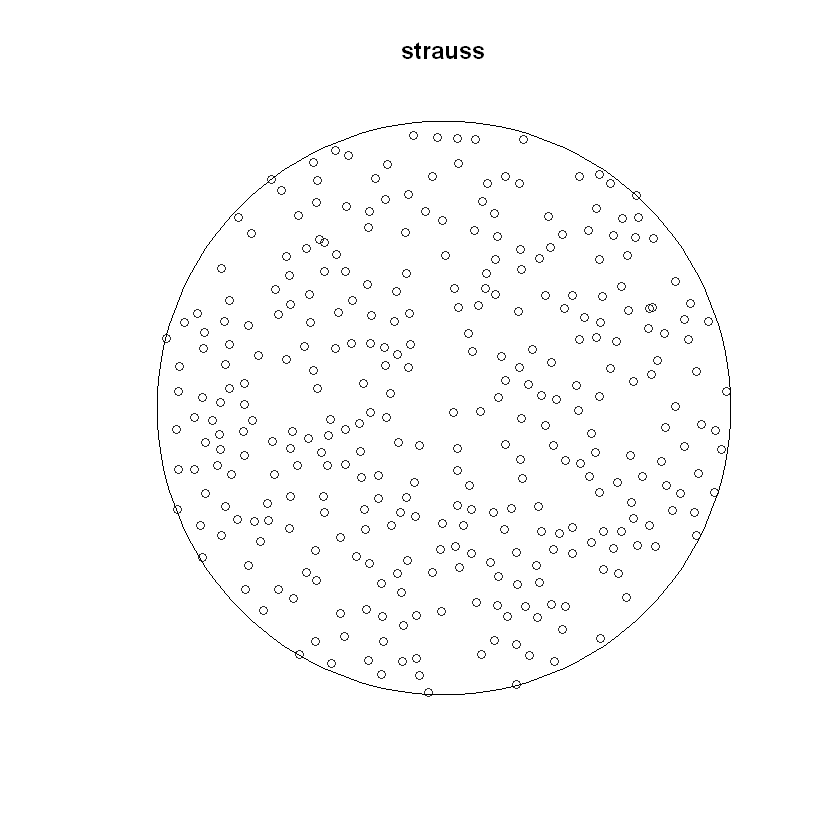

In [100]:
strauss <- rStrauss(beta = 2.9, gamma = 0.025, R = 0.5, W = disc10)
plot(strauss)

In [101]:
quadrat.test(strauss, alternative = "regular")

Warning message:
"Some expected counts are small; chi^2 approximation may be inaccurate"


	Chi-squared test of CSR using quadrat counts
	Pearson X2 statistic

data:  strauss
X2 = 11.653, df = 24, p-value = 0.01646
alternative hypothesis: regular

Quadrats: 25 tiles (irregular windows)

#### The P-Values in the quadrat.tests determined the properties of the pattern

One problem with the quadrat.test function is that you would have to choose the number of subregions. Too few and you don't have many numbers for the statistical tests to have much power. Too many and your regions won't have many points in them - you'll lose statistical powers too. 

Another way to assess clustering and regularity is to consider each point and how it relates to the other points. One simple measure is the distribution of the distances from each point to its nearest neighbor. 

Nearest Neighbors distribution looks at each events in the pattern and finds the distance to the nearest event. Once we do this for every event, we plot a histogram to get an estimate of the probability density function (PDF) of the nearest neighbors distribution. The cumulative distribution function (CDF) is the probability of finding a nearest neighbor within a distance D. 